## Data Cleaning and Merging Part
In this part I import 4 different datasets that I might use for the analysis. These are the four African countries with an ongoing counflict. The process includes data cleaning, namely removing unnecessary columns, making sure there are no NA values, collapsing the data by month since it's a time series based on monthly event data. 
All the data represents an event conflict data of the following categories:
1. Battles
2. Explosions/remote violence
3. Violent Protests
4. Riots
5. Violence Against civilians 

Time period: 1997-Present
292 observations

Source: ACLED

In [1]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)
import seaborn as sns #for vis
import matplotlib.pyplot as plt #additional library for this hwpr3
%matplotlib inline
from datetime import datetime
# import dateutil # to transform the date variable and further summarize the data based on month and year 
                #(Time Series unit of analysis)


In [2]:
# We are importing datasets of the same format for different African Countries. 
# each dataset contains a record of an event

filename = 'Ethiopia.csv'    # this will change!
df = pd.read_csv(filename, header=0)   # read the file w/header row #0
print(f"{filename} : file read into a pandas dataframe.")

Ethiopia.csv : file read into a pandas dataframe.


In [3]:
df

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,7917872,231,ETH6723,6723,4/23/21,2021,1,Protests,Peaceful protest,Protesters (Ethiopia),...,Debre Tabor,11.8500,38.0166,1,Amhara Media Corporation,Subnational,"On 23 April 2021, demonstrations against viole...",0,1619476352,ETH
1,7917875,231,ETH6724,6724,4/23/21,2021,1,Protests,Peaceful protest,Protesters (Ethiopia),...,Dejen,10.1667,38.1452,1,Amhara Media Corporation,Subnational,"On 23 April 2021, demonstrations against viole...",0,1619476352,ETH
2,7917877,231,ETH6728,6728,4/23/21,2021,1,Protests,Peaceful protest,Protesters (Ethiopia),...,Tilili,10.8551,37.0206,1,Amhara Media Corporation,Subnational,"On 23 April 2021, demonstrations against viole...",0,1619476352,ETH
3,7917880,231,ETH6721,6721,4/23/21,2021,1,Protests,Peaceful protest,Protesters (Ethiopia),...,Debark,13.1561,37.8981,1,Amhara Media Corporation,Subnational,"On 23 April 2021, demonstrations against viole...",0,1619476352,ETH
4,7917884,231,ETH6718,6718,4/23/21,2021,1,Protests,Peaceful protest,Protesters (Ethiopia),...,Addis Kidame,11.0820,36.8862,1,Amhara Media Corporation,Subnational,"On 23 April 2021, demonstrations against viole...",0,1619476352,ETH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6601,7680315,231,ETH5,5,3/30/97,1997,1,Protests,Peaceful protest,Protesters (Ethiopia),...,Addis Ababa,9.0250,38.7469,1,All Africa,Regional,Opposition groups stage protest over land redi...,0,1618530094,ETH
6602,7680615,231,ETH4,4,3/21/97,1997,1,Protests,Excessive force against protesters,Protesters (Ethiopia),...,Addis Ababa,9.0250,38.7469,1,All Africa,Regional,Students stage demonstration; security forces ...,0,1618529973,ETH
6603,6974348,231,ETH3,3,2/15/97,1997,3,Strategic developments,Headquarters or base established,SPLM/A: Sudan People's Liberation Movement/Army,...,Gambella,8.2500,34.5833,1,All Africa,Regional,SPLA maintain office and base in Gambella,0,1618529858,ETH
6604,7772143,231,ETH2,2,2/10/97,1997,1,Explosions/Remote violence,Grenade,Unidentified Armed Group (Ethiopia),...,Harar,9.3122,42.1238,1,Reuters,International,Grenade attack by unknown attackers wounds for...,2,1618529747,ETH


In [4]:
#create a count variable for each individual event in the dataset so we can later collapse by month
df['event'] = 1

In [5]:
## see the description of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6606 entries, 0 to 6605
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_id           6606 non-null   int64  
 1   iso               6606 non-null   int64  
 2   event_id_cnty     6606 non-null   object 
 3   event_id_no_cnty  6606 non-null   int64  
 4   event_date        6606 non-null   object 
 5   year              6606 non-null   int64  
 6   time_precision    6606 non-null   int64  
 7   event_type        6606 non-null   object 
 8   sub_event_type    6606 non-null   object 
 9   actor1            6606 non-null   object 
 10  assoc_actor_1     2384 non-null   object 
 11  inter1            6606 non-null   int64  
 12  actor2            5032 non-null   object 
 13  assoc_actor_2     1547 non-null   object 
 14  inter2            6606 non-null   int64  
 15  interaction       6606 non-null   int64  
 16  region            6606 non-null   object 


In [6]:
## We have different type of event in the dataset including non-violent (peaceful protests, demonstrations
#other events that contribute to state's history) and violent. 
# We want to tease out those peaceful ones and only leave the events that lean more towards conflict and violence
df = df[df["event_type"].str.contains("Strategic developments")==False]
df = df[df["sub_event_type"].str.contains("Peaceful protest")==False]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 12 to 6604
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_id           4998 non-null   int64  
 1   iso               4998 non-null   int64  
 2   event_id_cnty     4998 non-null   object 
 3   event_id_no_cnty  4998 non-null   int64  
 4   event_date        4998 non-null   object 
 5   year              4998 non-null   int64  
 6   time_precision    4998 non-null   int64  
 7   event_type        4998 non-null   object 
 8   sub_event_type    4998 non-null   object 
 9   actor1            4998 non-null   object 
 10  assoc_actor_1     1462 non-null   object 
 11  inter1            4998 non-null   int64  
 12  actor2            4862 non-null   object 
 13  assoc_actor_2     1484 non-null   object 
 14  inter2            4998 non-null   int64  
 15  interaction       4998 non-null   int64  
 16  region            4998 non-null   object 

In [8]:
df.event_date = pd.to_datetime(df.event_date)
df.set_index('event_date', inplace=True)

In [9]:
df= df.resample('M').sum()


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 291 entries, 1997-02-28 to 2021-04-30
Freq: M
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_id           291 non-null    int64  
 1   iso               291 non-null    int64  
 2   event_id_no_cnty  291 non-null    int64  
 3   year              291 non-null    int64  
 4   time_precision    291 non-null    int64  
 5   inter1            291 non-null    int64  
 6   inter2            291 non-null    int64  
 7   interaction       291 non-null    int64  
 8   latitude          291 non-null    float64
 9   longitude         291 non-null    float64
 10  geo_precision     291 non-null    int64  
 11  fatalities        291 non-null    int64  
 12  timestamp         291 non-null    int64  
 13  event             291 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 34.1 KB


In [11]:
df['year'] = df.index.year

In [12]:
df['event_date'] = df.index.date

In [13]:
df1 = df[['event_date','year', 'event','fatalities']]

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 291 entries, 1997-02-28 to 2021-04-30
Freq: M
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_date  291 non-null    object
 1   year        291 non-null    int64 
 2   event       291 non-null    int64 
 3   fatalities  291 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 11.4+ KB


In [15]:
ethiopia = df1


In [16]:
ethiopia = ethiopia.rename(columns={"event": "ethiopia_event", "fatalities": "ethiopia_fatalities"})

In [17]:
ethiopia

,event_date,year,ethiopia_event,ethiopia_fatalities
event_date,,,,
1997-02-28,1997-02-28,1997,1,2
1997-03-31,1997-03-31,1997,1,0
1997-04-30,1997-04-30,1997,4,1
1997-05-31,1997-05-31,1997,2,1
1997-06-30,1997-06-30,1997,5,67
...,...,...,...,...
2020-12-31,2020-12-31,2020,158,889
2021-01-31,2021-01-31,2021,144,333
2021-02-28,2021-02-28,2021,170,403


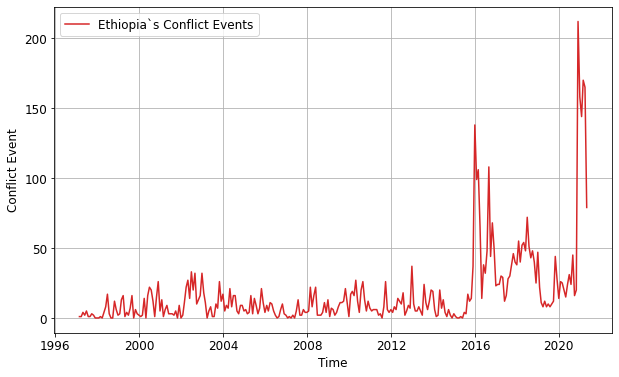

In [18]:
## Simple Time Series Plot
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(ethiopia.event_date, ethiopia.ethiopia_event, color='tab:red', label='Ethiopia`s Conflict Events')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Conflict Event')
# ax.set_title('Buoy Wind Data')
ax.grid(True)
ax.legend(loc='upper left');

## Repeat data cleaning for SOMALIA

In [19]:
#### SOMALIA #### 
filename = 'Somalia.csv'    # this will change!
somalia = pd.read_csv(filename, header=0)   # read the file w/header row #0
print(f"{filename} : file read into a pandas dataframe.")

Somalia.csv : file read into a pandas dataframe.


In [20]:
somalia.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,7918374,706,SOM33687,33687,4/22/21,2021,1,Violence against civilians,Attack,Al Shabaab,...,Mogadishu - Karan,2.0652,45.3900,1,Somali Memo,National,"On 22 April 2021, suspected Al Shabaab militan...",1,1619476353,SOM
1,7918375,706,SOM33686,33686,4/22/21,2021,1,Battles,Armed clash,Al Shabaab,...,Mogadishu - Hodan,2.0333,45.3500,1,Somali Memo,National,"On 22 April 2021, suspected Al Shabaab militan...",1,1619476353,SOM
2,7918477,706,SOM33684,33684,4/22/21,2021,1,Battles,Armed clash,Military Forces of Somalia (2017-),...,Baidoa,3.1172,43.6469,1,Undisclosed Source,Local partner-Other,"On 22 April 2021, government security forces (...",0,1619476353,SOM
3,7918512,706,SOM33688,33688,4/22/21,2021,1,Violence against civilians,Attack,Military Forces of Somalia (2017-) National In...,...,Mogadishu - Waaberi,2.0195,45.3100,1,Undisclosed Source,Local partner-Other,"On 22 April 2021, government security forces (...",0,1619476354,SOM
4,7918532,706,SOM33685,33685,4/22/21,2021,1,Violence against civilians,Attack,Al Shabaab,...,Mogadishu,2.0414,45.3337,1,VOA,International,"On 22 April 2021, suspected Al Shabaab militan...",1,1619476354,SOM


In [21]:
# clean the data
somalia['event'] = 1 # Add a count variable for the number of events

In [22]:
## We have different type of event in the dataset including non-violent (peaceful protests, demonstrations
#other events that contribute to state's history) and violent. 
# We want to tease out those peaceful ones and only leave the events that lean more towards conflict and violence
somalia = somalia[somalia["event_type"].str.contains("Strategic developments")==False]
somalia = somalia[somalia["sub_event_type"].str.contains("Peaceful protest")==False]

In [23]:
somalia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29919 entries, 0 to 33403
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_id           29919 non-null  int64  
 1   iso               29919 non-null  int64  
 2   event_id_cnty     29919 non-null  object 
 3   event_id_no_cnty  29919 non-null  int64  
 4   event_date        29919 non-null  object 
 5   year              29919 non-null  int64  
 6   time_precision    29919 non-null  int64  
 7   event_type        29919 non-null  object 
 8   sub_event_type    29919 non-null  object 
 9   actor1            29919 non-null  object 
 10  assoc_actor_1     1920 non-null   object 
 11  inter1            29919 non-null  int64  
 12  actor2            29595 non-null  object 
 13  assoc_actor_2     4751 non-null   object 
 14  inter2            29919 non-null  int64  
 15  interaction       29919 non-null  int64  
 16  region            29919 non-null  object

In [24]:
#clean up the data
somalia.event_date = pd.to_datetime(somalia.event_date)
somalia.set_index('event_date', inplace=True)
somalia= somalia.resample('M').sum()
somalia['year'] = somalia.index.year
somalia['event_date'] = somalia.index.date
somalia1 = somalia[['event_date','year', 'event','fatalities']]


In [25]:
somalia1.info()
somalia_final = somalia1
somalia_final

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 291 entries, 1997-02-28 to 2021-04-30
Freq: M
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_date  291 non-null    object
 1   year        291 non-null    int64 
 2   event       291 non-null    int64 
 3   fatalities  291 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 11.4+ KB


,event_date,year,event,fatalities
event_date,,,,
1997-02-28,1997-02-28,1997,1,1
1997-03-31,1997-03-31,1997,1,0
1997-04-30,1997-04-30,1997,1,2
1997-05-31,1997-05-31,1997,0,0
1997-06-30,1997-06-30,1997,10,39
...,...,...,...,...
2020-12-31,2020-12-31,2020,264,271
2021-01-31,2021-01-31,2021,236,273
2021-02-28,2021-02-28,2021,231,244


In [26]:
somalia_final = somalia_final.rename(columns={"event": "somalia_event", "fatalities": "somalia_fatalities"
                                              , "event_date":"somaliaEvent_date", "year": "somalia_year"})
somalia_final.head()

,somaliaEvent_date,somalia_year,somalia_event,somalia_fatalities
event_date,,,,
1997-02-28,1997-02-28,1997,1,1
1997-03-31,1997-03-31,1997,1,0
1997-04-30,1997-04-30,1997,1,2
1997-05-31,1997-05-31,1997,0,0
1997-06-30,1997-06-30,1997,10,39


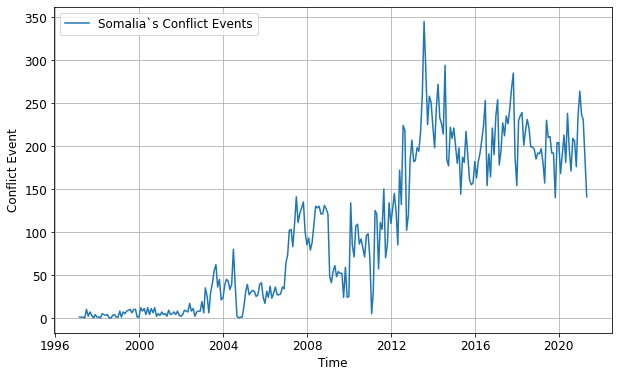

In [27]:
## Simple Time Series Plot
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(somalia_final.somaliaEvent_date, somalia_final.somalia_event, color='tab:blue', label='Somalia`s Conflict Events')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Conflict Event')
# ax.set_title('Buoy Wind Data')
ax.grid(True)
ax.legend(loc='upper left');

In [28]:
# merge the two datasets together and call it ethiopia-somalia or eSomalia
eSomalia = pd.concat([ethiopia, somalia_final], axis=1)

In [29]:
eSomalia

,event_date,year,ethiopia_event,ethiopia_fatalities,somaliaEvent_date,somalia_year,somalia_event,somalia_fatalities
event_date,,,,,,,,
1997-02-28,1997-02-28,1997,1,2,1997-02-28,1997,1,1
1997-03-31,1997-03-31,1997,1,0,1997-03-31,1997,1,0
1997-04-30,1997-04-30,1997,4,1,1997-04-30,1997,1,2
1997-05-31,1997-05-31,1997,2,1,1997-05-31,1997,0,0
1997-06-30,1997-06-30,1997,5,67,1997-06-30,1997,10,39
...,...,...,...,...,...,...,...,...
2020-12-31,2020-12-31,2020,158,889,2020-12-31,2020,264,271
2021-01-31,2021-01-31,2021,144,333,2021-01-31,2021,236,273
2021-02-28,2021-02-28,2021,170,403,2021-02-28,2021,231,244


In [30]:
#see how many NAs there are
eSomalia.isna().sum()

event_date             0
year                   0
ethiopia_event         0
ethiopia_fatalities    0
somaliaEvent_date      0
somalia_year           0
somalia_event          0
somalia_fatalities     0
dtype: int64

In [31]:
# Drop unnecessary variables
eSomalia = eSomalia.drop('somalia_year', axis=1)
eSomalia = eSomalia.drop('somaliaEvent_date', axis=1)


In [32]:
# Replace NAs with 0
eSomalia = eSomalia.fillna(0)
#Check again if there are any NAs left - we are good
eSomalia.isna().sum()

event_date             0
year                   0
ethiopia_event         0
ethiopia_fatalities    0
somalia_event          0
somalia_fatalities     0
dtype: int64

## Repeat data cleaning for Libya

In [33]:
#### LIBYA #### 
filename = 'Libya.csv'    # this will change!
libya = pd.read_csv(filename, header=0)   # read the file w/header row #0
print(f"{filename} : file read into a pandas dataframe.")

Libya.csv : file read into a pandas dataframe.


In [34]:
# Add a count variable for the number of events
libya['libya_event'] = 1

In [35]:
## We have different type of event in the dataset including non-violent (peaceful protests, demonstrations
#other events that contribute to state's history) and violent. 
# We want to tease out those peaceful ones and only leave the events that lean more towards conflict and violence
libya = libya[libya["event_type"].str.contains("Strategic developments")==False]
libya = libya[libya["sub_event_type"].str.contains("Peaceful protest")==False]

In [36]:
libya.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8551 entries, 4 to 10359
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_id           8551 non-null   int64  
 1   iso               8551 non-null   int64  
 2   event_id_cnty     8551 non-null   object 
 3   event_id_no_cnty  8551 non-null   int64  
 4   event_date        8551 non-null   object 
 5   year              8551 non-null   int64  
 6   time_precision    8551 non-null   int64  
 7   event_type        8551 non-null   object 
 8   sub_event_type    8551 non-null   object 
 9   actor1            8551 non-null   object 
 10  assoc_actor_1     943 non-null    object 
 11  inter1            8551 non-null   int64  
 12  actor2            7720 non-null   object 
 13  assoc_actor_2     2019 non-null   object 
 14  inter2            8551 non-null   int64  
 15  interaction       8551 non-null   int64  
 16  region            8551 non-null   object 

In [37]:
libya.event_date = pd.to_datetime(libya.event_date)
libya.set_index('event_date', inplace=True)

In [38]:
libya= libya.resample('M').sum()


In [39]:
libya['year'] = libya.index.year
libya['event_date'] = libya.index.date
libya1 = libya[['event_date','year', 'libya_event','fatalities']]

In [40]:
libya_final = libya1
libya_final.info()
libya_final.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292 entries, 1997-01-31 to 2021-04-30
Freq: M
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   event_date   292 non-null    object
 1   year         292 non-null    int64 
 2   libya_event  292 non-null    int64 
 3   fatalities   292 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 11.4+ KB


,event_date,year,libya_event,fatalities
event_date,,,,
1997-01-31,1997-01-31,1997,1,8
1997-02-28,1997-02-28,1997,0,0
1997-03-31,1997-03-31,1997,0,0
1997-04-30,1997-04-30,1997,0,0
1997-05-31,1997-05-31,1997,0,0


In [41]:
libya_final = libya_final.rename(columns={"fatalities": "libya_fatalities"
                                              , "event_date":"libyaEvent_date", "year": "libya_year"})

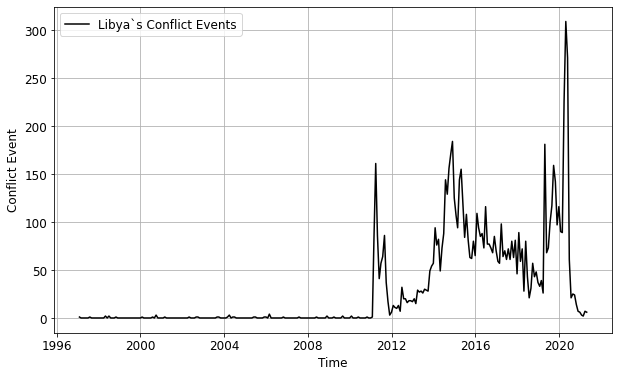

In [42]:
## Simple Time Series Plot
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(libya_final.libyaEvent_date, libya_final.libya_event, color='black', label='Libya`s Conflict Events')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Conflict Event')
# ax.set_title('Buoy Wind Data')
ax.grid(True)
ax.legend(loc='upper left');

In [43]:
# Merge 3 datasets(Ethiopia+Somalia & Libya, call it "ESLibya")
ESLibya = pd.concat([eSomalia, libya_final], axis=1)

In [44]:
ESLibya.head()

,event_date,year,ethiopia_event,ethiopia_fatalities,somalia_event,somalia_fatalities,libyaEvent_date,libya_year,libya_event,libya_fatalities
event_date,,,,,,,,,,
1997-01-31,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-31,1997,1,8
1997-02-28,1997-02-28,1997.0,1.0,2.0,1.0,1.0,1997-02-28,1997,0,0
1997-03-31,1997-03-31,1997.0,1.0,0.0,1.0,0.0,1997-03-31,1997,0,0
1997-04-30,1997-04-30,1997.0,4.0,1.0,1.0,2.0,1997-04-30,1997,0,0
1997-05-31,1997-05-31,1997.0,2.0,1.0,0.0,0.0,1997-05-31,1997,0,0


In [45]:
#Check for NAs
ESLibya.isna().sum()

event_date             1
year                   1
ethiopia_event         1
ethiopia_fatalities    1
somalia_event          1
somalia_fatalities     1
libyaEvent_date        0
libya_year             0
libya_event            0
libya_fatalities       0
dtype: int64

In [46]:
#Drop unnecessary columns
ESLibya = ESLibya.drop('libya_year', axis=1)
ESLibya = ESLibya.drop('libyaEvent_date', axis=1)
ESLibya.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292 entries, 1997-01-31 to 2021-04-30
Freq: M
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   event_date           291 non-null    object 
 1   year                 291 non-null    float64
 2   ethiopia_event       291 non-null    float64
 3   ethiopia_fatalities  291 non-null    float64
 4   somalia_event        291 non-null    float64
 5   somalia_fatalities   291 non-null    float64
 6   libya_event          292 non-null    int64  
 7   libya_fatalities     292 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 30.5+ KB


In [47]:
# Replace NAs with 0
ESLibya = ESLibya.fillna(0)
#Check again if there are any NAs left - we are good
ESLibya.isna().sum()

event_date             0
year                   0
ethiopia_event         0
ethiopia_fatalities    0
somalia_event          0
somalia_fatalities     0
libya_event            0
libya_fatalities       0
dtype: int64

## Repeat data cleaning for Rwanda

In [48]:
#### NIGERIA #### 
filename = 'Nigeria.csv'    
nigeria = pd.read_csv(filename, header=0)   # read the file w/header row #0
print(f"{filename} : file read into a pandas dataframe.")

Nigeria.csv : file read into a pandas dataframe.


In [49]:
nigeria['nigeria_event'] = 1 # Add a count variable for the number of events
nigeria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20213 entries, 0 to 20212
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_id           20213 non-null  int64  
 1   iso               20213 non-null  int64  
 2   event_id_cnty     20213 non-null  object 
 3   event_id_no_cnty  20213 non-null  int64  
 4   event_date        20213 non-null  object 
 5   year              20213 non-null  int64  
 6   time_precision    20213 non-null  int64  
 7   event_type        20213 non-null  object 
 8   sub_event_type    20213 non-null  object 
 9   actor1            20213 non-null  object 
 10  assoc_actor_1     6108 non-null   object 
 11  inter1            20213 non-null  int64  
 12  actor2            14894 non-null  object 
 13  assoc_actor_2     3846 non-null   object 
 14  inter2            20213 non-null  int64  
 15  interaction       20213 non-null  int64  
 16  region            20213 non-null  object

In [50]:
## We have different type of event in the dataset including non-violent (peaceful protests, demonstrations
#other events that contribute to state's history) and violent. 
# We want to tease out those peaceful ones and only leave the events that lean more towards conflict and violence
nigeria = nigeria[nigeria["event_type"].str.contains("Strategic developments")==False]
nigeria = nigeria[nigeria["sub_event_type"].str.contains("Peaceful protest")==False]
nigeria.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15063 entries, 1 to 20212
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_id           15063 non-null  int64  
 1   iso               15063 non-null  int64  
 2   event_id_cnty     15063 non-null  object 
 3   event_id_no_cnty  15063 non-null  int64  
 4   event_date        15063 non-null  object 
 5   year              15063 non-null  int64  
 6   time_precision    15063 non-null  int64  
 7   event_type        15063 non-null  object 
 8   sub_event_type    15063 non-null  object 
 9   actor1            15063 non-null  object 
 10  assoc_actor_1     3466 non-null   object 
 11  inter1            15063 non-null  int64  
 12  actor2            14406 non-null  object 
 13  assoc_actor_2     3706 non-null   object 
 14  inter2            15063 non-null  int64  
 15  interaction       15063 non-null  int64  
 16  region            15063 non-null  object

In [51]:
#Reiterate cleaning process for Rwanda
nigeria.event_date = pd.to_datetime(nigeria.event_date)

nigeria.set_index('event_date', inplace=True)
nigeria= nigeria.resample('M').sum() #collapse by month

nigeria['year'] = nigeria.index.year #transform year var into an index to further work with it
nigeria['event_date'] = nigeria.index.date #repeat for event_date
nigeria1 = nigeria[['event_date','year', 'nigeria_event','fatalities']] #only keep these 4 variables for our further models
nigeria_final = nigeria1
#rename not to mix up with other datasets
nigeria_final = nigeria_final.rename(columns={"fatalities": "nigeria_fatalities",
                                              "event_date":"nigeriaEvent_date", "year": "nigeria_year"})

In [52]:
nigeria_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292 entries, 1997-01-31 to 2021-04-30
Freq: M
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   nigeriaEvent_date   292 non-null    object
 1   nigeria_year        292 non-null    int64 
 2   nigeria_event       292 non-null    int64 
 3   nigeria_fatalities  292 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 11.4+ KB


In [53]:
# Merge all 8 datasets(Ethiopia+Somalia+Libya+Rwanda+Eritrea+South Africa+Niger & Nigeria, call it "masterNI")
masterNI = pd.concat([ESLibya,nigeria_final], axis=1)
#Drop unnecessary columns
masterNI = masterNI.drop('nigeria_year', axis=1)
masterNI = masterNI.drop('nigeriaEvent_date', axis=1)
masterNI.isna().sum()

event_date             0
year                   0
ethiopia_event         0
ethiopia_fatalities    0
somalia_event          0
somalia_fatalities     0
libya_event            0
libya_fatalities       0
nigeria_event          0
nigeria_fatalities     0
dtype: int64

In [54]:
masterNI.head()

,event_date,year,ethiopia_event,ethiopia_fatalities,somalia_event,somalia_fatalities,libya_event,libya_fatalities,nigeria_event,nigeria_fatalities
event_date,,,,,,,,,,
1997-01-31,0,0.0,0.0,0.0,0.0,0.0,1,8,12,11
1997-02-28,1997-02-28,1997.0,1.0,2.0,1.0,1.0,0,0,13,30
1997-03-31,1997-03-31,1997.0,1.0,0.0,1.0,0.0,0,0,16,38
1997-04-30,1997-04-30,1997.0,4.0,1.0,1.0,2.0,0,0,17,112
1997-05-31,1997-05-31,1997.0,2.0,1.0,0.0,0.0,0,0,11,17


## Exploratory Data Analysis (EDA)

In [55]:
#let's look at the total number of deaths per country from 1997-2021
# .set_index('event_date', inplace=True)
deathsYear = masterNI.resample('y').sum() #collapse by year
deathsYear['year'] = deathsYear.index.year #transform year var into an index to further work with it
deathsYear.head()

,year,ethiopia_event,ethiopia_fatalities,somalia_event,somalia_fatalities,libya_event,libya_fatalities,nigeria_event,nigeria_fatalities
event_date,,,,,,,,,
1997-12-31,1997,20.0,84.0,30.0,49.0,2,9,128,472
1998-12-31,1998,53.0,958.0,26.0,4.0,5,2,130,1282
1999-12-31,1999,73.0,18839.0,76.0,110.0,0,0,177,1796
2000-12-31,2000,134.0,1407.0,90.0,33.0,5,52,155,3345
2001-12-31,2001,54.0,894.0,60.0,72.0,1,0,116,2183


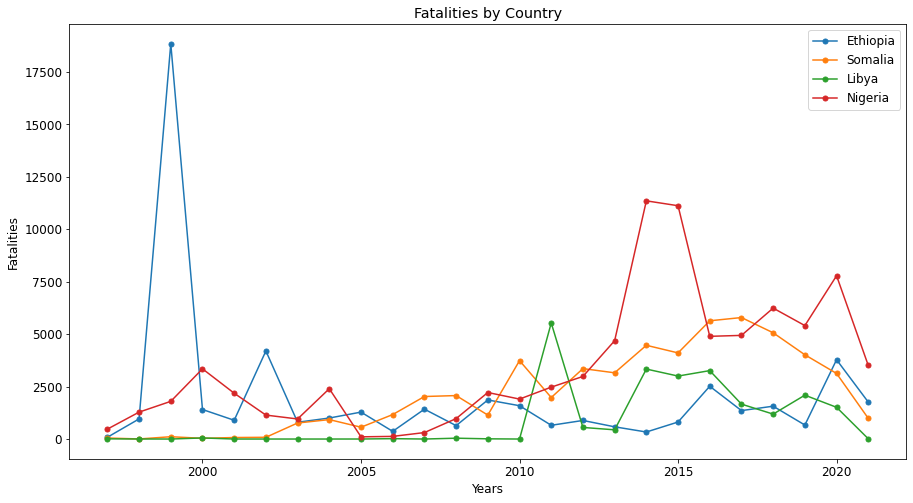

In [56]:
deathsYear.plot(x='year',y=["ethiopia_fatalities", "somalia_fatalities", "libya_fatalities", 
                  "nigeria_fatalities"],figsize=(15,8),
                linestyle='-', marker='.',markersize=10)
plt.title('Fatalities by Country')
plt.xlabel('Years')
plt.ylabel('Fatalities')
plt.legend(["Ethiopia","Somalia", "Libya", "Nigeria"])

In [57]:
deathsYear.head()

,year,ethiopia_event,ethiopia_fatalities,somalia_event,somalia_fatalities,libya_event,libya_fatalities,nigeria_event,nigeria_fatalities
event_date,,,,,,,,,
1997-12-31,1997,20.0,84.0,30.0,49.0,2,9,128,472
1998-12-31,1998,53.0,958.0,26.0,4.0,5,2,130,1282
1999-12-31,1999,73.0,18839.0,76.0,110.0,0,0,177,1796
2000-12-31,2000,134.0,1407.0,90.0,33.0,5,52,155,3345
2001-12-31,2001,54.0,894.0,60.0,72.0,1,0,116,2183


In [58]:
masterNI.head()

,event_date,year,ethiopia_event,ethiopia_fatalities,somalia_event,somalia_fatalities,libya_event,libya_fatalities,nigeria_event,nigeria_fatalities
event_date,,,,,,,,,,
1997-01-31,0,0.0,0.0,0.0,0.0,0.0,1,8,12,11
1997-02-28,1997-02-28,1997.0,1.0,2.0,1.0,1.0,0,0,13,30
1997-03-31,1997-03-31,1997.0,1.0,0.0,1.0,0.0,0,0,16,38
1997-04-30,1997-04-30,1997.0,4.0,1.0,1.0,2.0,0,0,17,112
1997-05-31,1997-05-31,1997.0,2.0,1.0,0.0,0.0,0,0,11,17


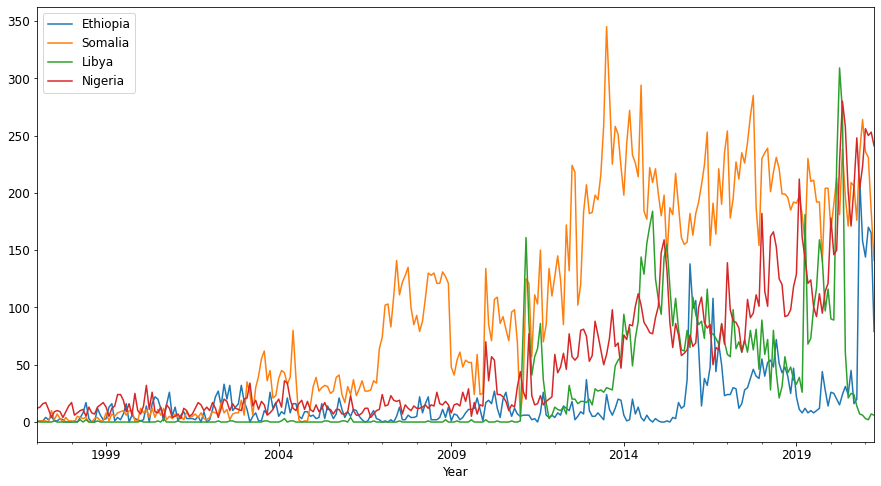

In [63]:
import matplotlib.pyplot as plt 
### TIME SERIES PLOTS FOR ALL 4 COUNTRIES TO VIEW IN COMPARISON
# let's look at 4 TS together in the same graph
masterNI.plot(y=["ethiopia_event", "somalia_event", "libya_event", 
                 "nigeria_event"], figsize=(15,8))
plt.legend().remove()
plt.xlabel("Year")
plt.legend(["Ethiopia", "Somalia", "Libya", "Nigeria" ])

Text(0.5, 0, 'Year')

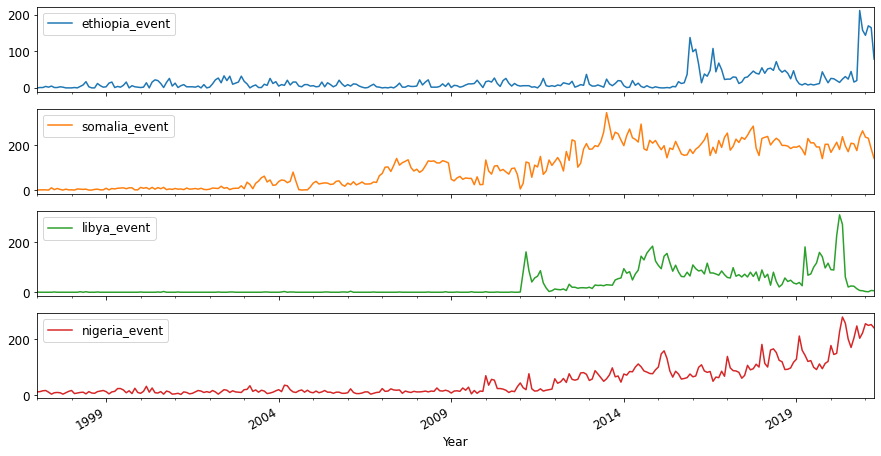

In [65]:
## Now all 4 in subplots
masterNI.plot(y=["ethiopia_event", "somalia_event", "libya_event",
               "nigeria_event"],subplots=True, figsize=(15,8))
plt.xlabel("Year")

In [154]:
masterNI.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292 entries, 1997-01-31 to 2021-04-30
Freq: M
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   event_date           292 non-null    object 
 1   year                 292 non-null    float64
 2   ethiopia_event       292 non-null    float64
 3   ethiopia_fatalities  292 non-null    float64
 4   somalia_event        292 non-null    float64
 5   somalia_fatalities   292 non-null    float64
 6   libya_event          292 non-null    int64  
 7   libya_fatalities     292 non-null    int64  
 8   nigeria_event        292 non-null    int64  
 9   nigeria_fatalities   292 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 35.1+ KB


In [155]:
#drop the time date variable so we can run statistical tests without running into the variable format issue
analysis = masterNI.drop("event_date", axis =1)

In [156]:
analysis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292 entries, 1997-01-31 to 2021-04-30
Freq: M
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 292 non-null    float64
 1   ethiopia_event       292 non-null    float64
 2   ethiopia_fatalities  292 non-null    float64
 3   somalia_event        292 non-null    float64
 4   somalia_fatalities   292 non-null    float64
 5   libya_event          292 non-null    int64  
 6   libya_fatalities     292 non-null    int64  
 7   nigeria_event        292 non-null    int64  
 8   nigeria_fatalities   292 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 32.8 KB


In [157]:
#Let's only keep the final 4 time series we decided to work with (drop fatalities time series)
final = analysis[['year','ethiopia_event', 'somalia_event', 'libya_event', 'nigeria_event']]
final.head()

,year,ethiopia_event,somalia_event,libya_event,nigeria_event
event_date,,,,,
1997-01-31,0.0,0.0,0.0,1,12
1997-02-28,1997.0,1.0,1.0,0,13
1997-03-31,1997.0,1.0,1.0,0,16
1997-04-30,1997.0,4.0,1.0,0,17
1997-05-31,1997.0,2.0,0.0,0,11


## Data Modeling Part

This part will conduct a Box-Jenkins method to fit the best ARMA model given the underlying data. 
This method consists of 3 parts:
1. Model Identification and Model Selection
2. Parameter Estimation
3. Statistical Model Checking and Evaluation

(1) The first part will look at the structure of the data and see whether it's a stationary process or not. It will also test the data for presence of any unit roots and in case there unit roots, it will transform the data by either taking a first difference of applying a filter to detrend the data in case there is a trend found. 
The goal of the first step is to bring the data into the workable format, which is stationarity as it's a requirement for ARMA modeling. Model Selection includes looking at correlogram, namely autocorrelation function (ACF) and a partical autocorrelation function (PACF) to determine the order of an Autoregressive component (AR) and a moving average component (MA). 

(2) After selecting and identifying the right models, we will estimate the parameters and produce some model outputs. Here, we will be looking into the singificant of the coefficients we estimate (for AR and MA) as well as the largest Log Likelihoods and the smallest values of information criteria (AIC and BIC) to evaluate the models and select the best. 

(3) Lastly, to make sure the model selected is a proper one, we need to test the residuals and make sure they have constant mean and variance and are stationary (white noise process). This can be done by looking at ACF and PACF plots as well. In case the estimate is inadequate, the overall process can be repeated. 


### 1. Model Identification and Model Selection

In [158]:
#Let's take a natural log of the event data to smooth variance and look at it in percentage terms (standard procedure)
import math
final['log_ethiopia'] = np.log(final['ethiopia_event'])

/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-158-71f209f1c51d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['log_ethiopia'] = np.log(final['ethiopia_event'])


In [159]:
final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292 entries, 1997-01-31 to 2021-04-30
Freq: M
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            292 non-null    float64
 1   ethiopia_event  292 non-null    float64
 2   somalia_event   292 non-null    float64
 3   libya_event     292 non-null    int64  
 4   nigeria_event   292 non-null    int64  
 5   log_ethiopia    292 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 26.0 KB


In [160]:
# since log_ethiopia has "inf" values, lets drop them so we can run further statistical tests
final.replace([np.inf, -np.inf], np.nan, inplace=True)
final = final.apply (pd.to_numeric, errors='coerce')
final = final.dropna()

final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 271 entries, 1997-02-28 to 2021-04-30
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            271 non-null    float64
 1   ethiopia_event  271 non-null    float64
 2   somalia_event   271 non-null    float64
 3   libya_event     271 non-null    int64  
 4   nigeria_event   271 non-null    int64  
 5   log_ethiopia    271 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 14.8 KB


/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [161]:
final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 271 entries, 1997-02-28 to 2021-04-30
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            271 non-null    float64
 1   ethiopia_event  271 non-null    float64
 2   somalia_event   271 non-null    float64
 3   libya_event     271 non-null    int64  
 4   nigeria_event   271 non-null    int64  
 5   log_ethiopia    271 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 14.8 KB


In [162]:
#Augmented Dickey-Fuller Test for Stationarity for Log Violent events in Ethiopia (last column)
from statsmodels.tsa.stattools import adfuller
X = final.values
result = adfuller(X[:,5],maxlag = 20)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# print(f'n_lags: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
# a statistically significant p-value indicates that we reject the Null hypothesis of a unit root, which means that there is 
#no unit root and the process is I(0)


ADF Statistic: -2.881941
p-value: 0.047489
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.573


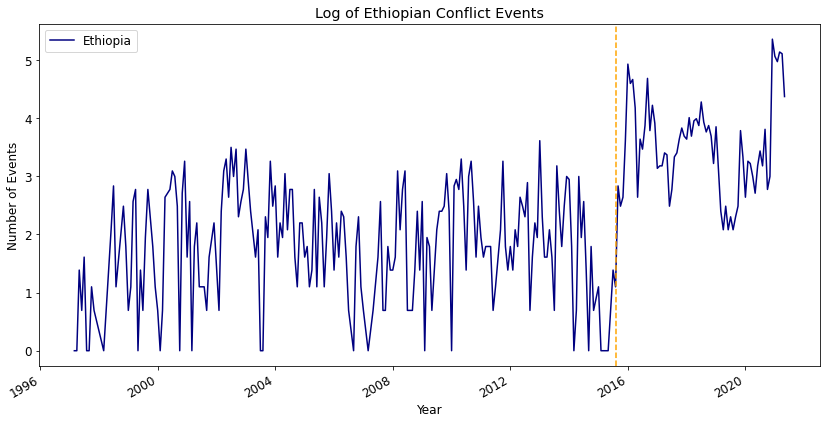

In [163]:
### Plot and inspect individual TS - Log ETHIOPIA
p = final.plot(y="log_ethiopia", figsize=(14,7), color = "navy")
p.axvline("2015-08-01", color="orange", linestyle="--")
plt.title('Log of Ethiopian Conflict Events')
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.legend(["Ethiopia"])
x= masterNI.year
# the plot shows that the mean is constant up until around 2016, whereas in early 2016 we see a 
#sudden spike in the number of events that change the mean, clearly demonstrating that the process is non-stationary
# (for the TS to be weakly stationary, it needs to be constant in mean, variance and covariance over time)

### Variable stationarity
Even thought the Augmented Dickey Fuller tests showed no presence of a unit root, from the Time series above we clearly see that the process is not stationary as the mean and variance change over time. For this reason, we are still going to take a first difference to make data stationary. ADF results here deemed unreliable which is expected  and confirmed by the literature when the TIme Series experience structural changes as we can clearly see here after 2015. Therefore, we will rely on the visual investigation and still take the first difference of the log_ethiopia and proceed from there. 

/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Ethiopia Time Series AC Plot')

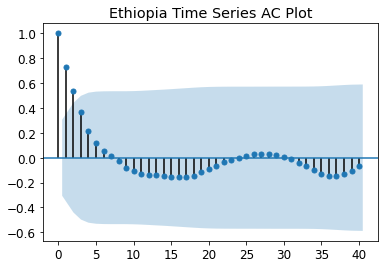

In [164]:
# Plot ACF to see whether the series suffer from serial correlation
# Autocorrelation seems to fade to 0 after about 3 lags which is not bad
# Number of lags outside 0 help determine the order of Moving Average in an ARMA model (in this case would be 3 or MA(3))
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
## Plot Autocorrelation
E = final["ethiopia_event"]
ethiopia_acf = acf(E)
plot_acf (ethiopia_acf, lags=40)
plt.title('Ethiopia Time Series AC Plot')


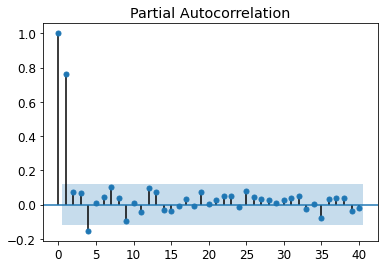

In [165]:
# Plot Partial Autocorrelation Function
# Plot PACF to see whether the series suffer from serial correlation controlling for past autocorrelation values
# Partial Autocorrelation seems to fade to 0 after about 2 periods, but around 4th period there PACF is significantly different
#from zero.
# Number of lags outside 0 help determine the order of an Autoregressive process (AR) in an ARMA model 
# (in this case we can try 2 or AR(2))
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(E.values.squeeze(), lags=40)
plt.show()

In [166]:
## Taking a first difference of the log_ethiopia variable

final['diff_log_ethiopia'] = final['log_ethiopia'] - final['log_ethiopia'].shift(1)
final['diff_log_ethiopia'].dropna()
final = final.dropna()
final.info()
final.isna().sum()
#as we can see we removed any variation over time and have a constant mean

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 270 entries, 1997-03-31 to 2021-04-30
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               270 non-null    float64
 1   ethiopia_event     270 non-null    float64
 2   somalia_event      270 non-null    float64
 3   libya_event        270 non-null    int64  
 4   nigeria_event      270 non-null    int64  
 5   log_ethiopia       270 non-null    float64
 6   diff_log_ethiopia  270 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 16.9 KB


year                 0
ethiopia_event       0
somalia_event        0
libya_event          0
nigeria_event        0
log_ethiopia         0
diff_log_ethiopia    0
dtype: int64

In [167]:
#Augmented Dickey-Fuller Test for Stationarity for Dif Log Violent events in Ethiopia (last column)
from statsmodels.tsa.stattools import adfuller
X = final.values
result = adfuller(X[:,6],maxlag = 20)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# print(f'n_lags: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
# clearly the process is stationary and has no unit roots



ADF Statistic: -11.212392
p-value: 0.000000
Critical Values:
	1%: -3.455
	5%: -2.873
	10%: -2.573


/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


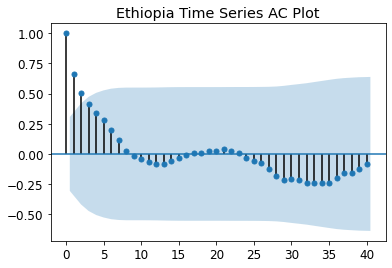

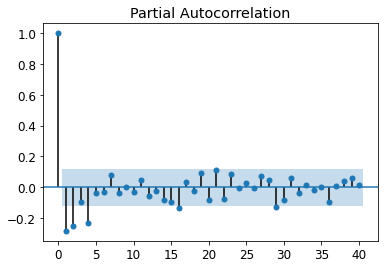

In [184]:
# Plot ACF to see whether the series suffer from serial correlation
# Autocorrelation seems to fade to 0 after about 3 lags which is not bad
# Number of lags outside 0 help determine the order of Moving Average in an ARMA model (in this case would be 3 or MA(3))
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
## Plot Autocorrelation
Eth = final["diff_log_ethiopia"]
ethiopia_acf = acf(E)
plot_acf (ethiopia_acf, lags=40)
plt.title('Ethiopia Time Series AC Plot')

# Plot Partial Autocorrelation Function
# Plot PACF to see whether the series suffer from serial correlation controlling for past autocorrelation values
# Partial Autocorrelation seems to fade to 0 after about 3-4 periods, but around 4th period there PACF is significantly different
#from zero.
# Number of lags outside 0 help determine the order of an Autoregressive process (AR) in an ARMA model 
# (in this case we can try 2 or AR(2))
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(Eth.values.squeeze(), lags=40)
plt.show()

### 2. Parameter Estimation

In [170]:
### PARAMETER ESTIMATION, STEP 2
# ARIMA of order (1,1,1) with AR(1), 1 order integration (1st difference), MA(1)
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from matplotlib import pyplot
E = final["log_ethiopia"]
model1 = ARIMA(E, order=(1,1,1))
model1_fit = model1.fit()
# summary of fit model
print(model1_fit.summary())



                               SARIMAX Results                                
Dep. Variable:           log_ethiopia   No. Observations:                  270
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -339.850
Date:                Fri, 14 May 2021   AIC                            685.701
Time:                        16:32:46   BIC                            696.485
Sample:                             0   HQIC                           690.032
                                - 270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3782      0.073      5.208      0.000       0.236       0.521
ma.L1         -0.8810      0.044    -19.831      0.000      -0.968      -0.794
sigma2         0.7303      0.065     11.235      0.0

/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [131]:
### PARAMETER ESTIMATION, STEP 2
# ARIMA of order (2,1,1) with AR(2), 1 order integration (1st difference), MA(1)
#integration is just differencing, so using "log_ethiopia" and putting 1 for an order of integration is pretty 
#much equivalent
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from matplotlib import pyplot
E = final["log_ethiopia"]
model2 = ARIMA(E, order=(2,1,1))
model2_fit = model2.fit()
# summary of fit model
print(model2_fit.summary())


                               SARIMAX Results                                
Dep. Variable:           log_ethiopia   No. Observations:                  265
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -332.356
Date:                Fri, 14 May 2021   AIC                            672.713
Time:                        16:26:34   BIC                            687.016
Sample:                             0   HQIC                           678.460
                                - 265                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4248      0.068      6.264      0.000       0.292       0.558
ar.L2          0.0246      0.067      0.365      0.715      -0.108       0.157
ma.L1         -0.9135      0.045    -20.229      0.0

/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [171]:
### PARAMETER ESTIMATION, STEP 2
# ARIMA of order (2,1,2) with AR(1), 1 order integration (1st difference), MA(2)
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from matplotlib import pyplot
E = final["log_ethiopia"]
model3 = ARIMA(E, order=(2,1,2))
model3_fit = model3.fit()
# summary of fit model
print(model3_fit.summary())


/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:           log_ethiopia   No. Observations:                  270
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -335.539
Date:                Fri, 14 May 2021   AIC                            681.077
Time:                        16:35:00   BIC                            699.051
Sample:                             0   HQIC                           688.296
                                - 270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5944      0.078     -7.655      0.000      -0.747      -0.442
ar.L2          0.2942      0.077      3.820      0.000       0.143       0.445
ma.L1          0.1427      1.685      0.085      0.9

/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [172]:
### PARAMETER ESTIMATION, STEP 2
# ARIMA of order (1,1,2) with AR(1), 1 order integration (1st difference), MA(2)
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from matplotlib import pyplot
E = final["log_ethiopia"]
model4 = ARIMA(E, order=(1,1,2))
model4_fit = model4.fit()
# summary of fit model
print(model4_fit.summary())

/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:           log_ethiopia   No. Observations:                  270
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -339.631
Date:                Fri, 14 May 2021   AIC                            687.262
Time:                        16:35:00   BIC                            701.640
Sample:                             0   HQIC                           693.036
                                - 270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5927      0.144      4.114      0.000       0.310       0.875
ma.L1         -1.1183      0.169     -6.605      0.000      -1.450      -0.786
ma.L2          0.1768      0.138      1.283      0.2

In [173]:
### PARAMETER ESTIMATION, STEP 2
# ARIMA of order (1,1,0) with AR(1), 1 order integration (1st difference), MA(0)
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from matplotlib import pyplot
E = final["log_ethiopia"]
model5 = ARIMA(E, order=(1,1,0))
model5_fit = model5.fit()
# summary of fit model
print(model5_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           log_ethiopia   No. Observations:                  270
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -360.410
Date:                Fri, 14 May 2021   AIC                            724.819
Time:                        16:35:01   BIC                            732.009
Sample:                             0   HQIC                           727.707
                                - 270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3136      0.057     -5.526      0.000      -0.425      -0.202
sigma2         0.8533      0.068     12.639      0.000       0.721       0.986
Ljung-Box (Q):                       52.26   Jarque-

/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [174]:
### PARAMETER ESTIMATION, STEP 2
# ARIMA of order (2,1,0) with AR(2), 1 order integration (1st difference), MA(0)
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from matplotlib import pyplot
E = final["log_ethiopia"]
model6 = ARIMA(E, order=(2,1,0))
model6_fit = model6.fit()
# summary of fit model
print(model6_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           log_ethiopia   No. Observations:                  270
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -350.458
Date:                Fri, 14 May 2021   AIC                            706.917
Time:                        16:35:01   BIC                            717.701
Sample:                             0   HQIC                           711.247
                                - 270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3971      0.059     -6.703      0.000      -0.513      -0.281
ar.L2         -0.2674      0.056     -4.781      0.000      -0.377      -0.158
sigma2         0.7920      0.062     12.721      0.0

/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


### Best model
Based on the information criteria, the best perfoming model is ARIMA (1,1,1) which is "model1". Remember that we look at the significance of our parameters as well as those models that minimize AIC, BIC, HQIC and maximize Log Likelihood
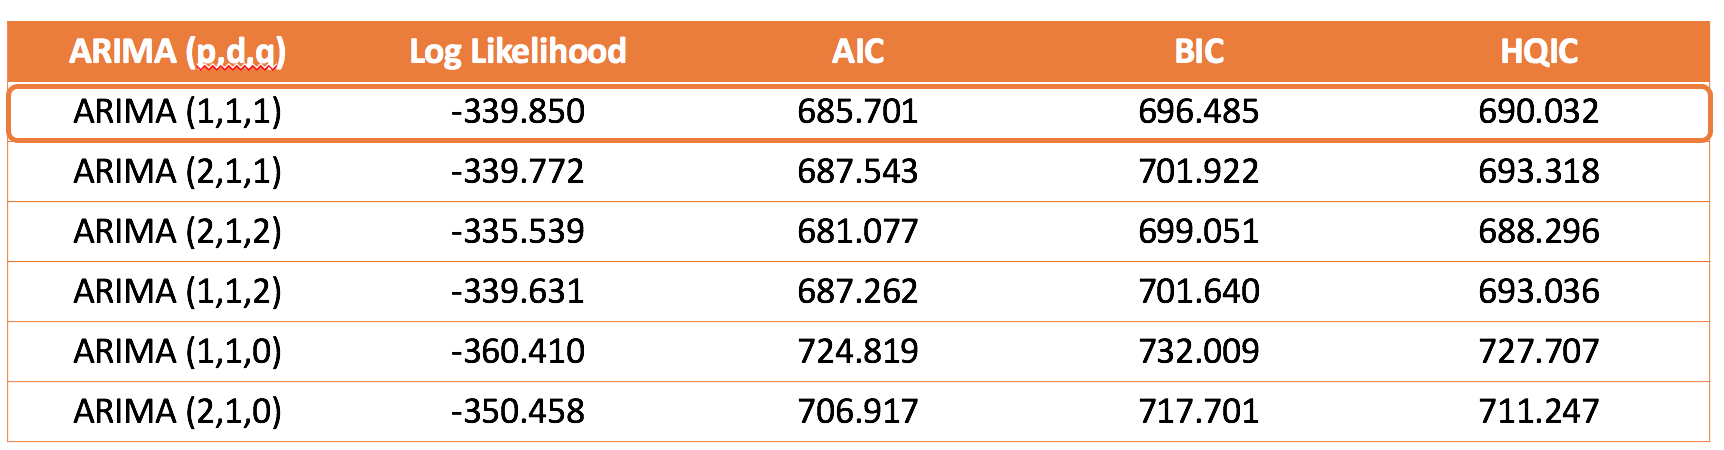

### 3. Statistical Model Checking and Evaluation

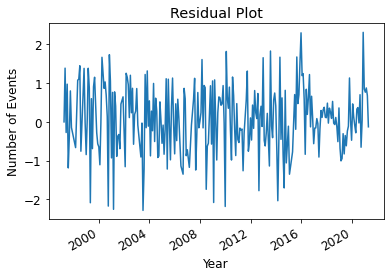

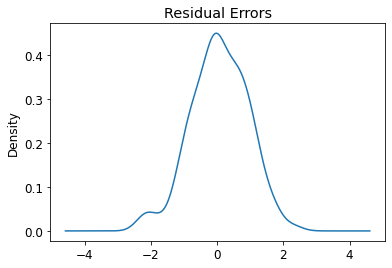

                0
count  270.000000
mean     0.070276
std      0.853423
min     -2.283777
25%     -0.500872
50%      0.072237
75%      0.677435
max      2.309967


In [175]:
#now let's evaluate our best performing Model 1 (ARIMA(1,1,1))
#line plot of residuals
#the residuals look beautiful and stationary (with constant mean and variance)
residuals = DataFrame(model1_fit.resid)
res = residuals.plot()
pyplot.title('Residual Plot')
pyplot.legend().remove()
pyplot.xlabel("Year")
pyplot.ylabel("Number of Events")
pyplot.show()

#density plot of residuals
residuals.plot(kind='kde')
pyplot.title('Residual Errors')
pyplot.legend().remove()
pyplot.show()
# summary stats of residuals
print(residuals.describe())

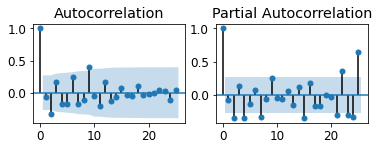

In [233]:
### Residual AC Plot, looks good as autocorrelation fades to 0 after the first lag 
from statsmodels.graphics.tsaplots import plot_pacf
pyplot.figure()
plt.plot([1,2,3])
ax1 = pyplot.subplot(221)
plot_acf(residuals, lags=25, ax=pyplot.gca())
ax2 = pyplot.subplot(222)
plot_pacf(residuals, lags=25, ax=pyplot.gca())
pyplot.show()


### Forecasting with ARIMA (1,1,1)

/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=0.014473, expected=-0.307485
predicted=0.005732, expected=-0.776529
predicted=-0.014311, expected=0.042560
predicted=0.043670, expected=0.000000
predicted=-0.016159, expected=0.223144
predicted=0.055493, expected=-0.033902
predicted=-0.028031, expected=-0.882389
predicted=0.007881, expected=0.287682
predicted=0.028537, expected=0.559616
predicted=0.025812, expected=0.068993
predicted=0.006022, expected=0.236389
predicted=0.035398, expected=0.191055
predicted=0.005529, expected=-0.139762
predicted=0.018534, expected=-0.051293
predicted=0.009164, expected=0.369747
predicted=0.041282, expected=-0.318454
predicted=-0.025829, expected=0.262364
predicted=0.070141, expected=0.037740
predicted=-0.035653, expected=-0.117783
predicted=0.061397, expected=0.405465
predicted=-0.007712, expected=-0.344840


/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


predicted=0.023008, expected=-0.170626
predicted=-0.000803, expected=0.110001
predicted=0.036962, expected=-0.182322
predicted=-0.016089, expected=-0.470004
predicted=0.019249, expected=0.631272
predicted=0.041184, expected=-0.759105
predicted=-0.053221, expected=-0.693147
predicted=0.038383, expected=-0.318454
predicted=-0.037807, expected=0.405465
predicted=0.076016, expected=-0.405465
predicted=-0.079099, expected=0.223144
predicted=0.106546, expected=-0.223144
predicted=-0.100676, expected=0.223144
predicted=0.127381, expected=0.182322
predicted=-0.099934, expected=1.299283
predicted=0.184620, expected=-0.451985
predicted=-0.175694, expected=-0.693147
predicted=0.166719, expected=0.619039
predicted=-0.115410, expected=-0.039221
predicted=0.136700, expected=-0.223144
predicted=-0.123526, expected=-0.287682
predicted=0.130180, expected=0.470004
predicted=-0.085506, expected=0.255933
predicted=0.121485, expected=-0.255933
predicted=-0.109201, expected=0.628609
predicted=0.162997, expe

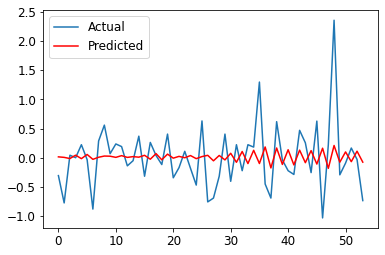

In [177]:
#### Forecasting with ARIMA(1,1,1)
from sklearn.metrics import mean_squared_error #forecaset evaluation metric RMSE
from math import sqrt
X = Eth.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.legend(["Actual", "Predicted"])
pyplot.show()

/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=-0.057181, expected=-0.307485
predicted=0.032740, expected=-0.776529
predicted=0.353264, expected=0.042560
predicted=-0.030927, expected=0.000000
predicted=0.050473, expected=0.223144
predicted=-0.076956, expected=-0.033902
predicted=0.040472, expected=-0.882389
predicted=0.263054, expected=0.287682
predicted=0.014771, expected=0.559616
predicted=-0.250582, expected=0.068993
predicted=0.054348, expected=0.236389
predicted=-0.107987, expected=0.191055
predicted=0.004069, expected=-0.139762
predicted=0.007708, expected=-0.051293
predicted=0.098966, expected=0.369747
predicted=-0.142937, expected=-0.318454
predicted=0.137381, expected=0.262364
predicted=-0.051069, expected=0.037740
predicted=-0.014957, expected=-0.117783
predicted=0.077090, expected=0.405465
predicted=-0.105310, expected=-0.344840
predicted=0.096968, expected=-0.170626
predicted=0.123035, expected=0.110001
predicted=-0.048571, expected=-0.182322
predicted=0.099384, expected=-0.470004
predicted=0.142063, expected

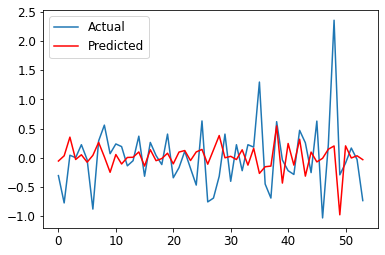

In [178]:
#### Forecasting with ARIMA (2,1,2)
from sklearn.metrics import mean_squared_error #forecaset evaluation metric RMSE
from math import sqrt
X = Eth.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.legend(["Actual", "Predicted"])
pyplot.show()

## Somalia
### 1. Model Identification

In [181]:
final['log_somalia'] = np.log(final['somalia_event'])
final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 270 entries, 1997-03-31 to 2021-04-30
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               270 non-null    float64
 1   ethiopia_event     270 non-null    float64
 2   somalia_event      270 non-null    float64
 3   libya_event        270 non-null    int64  
 4   nigeria_event      270 non-null    int64  
 5   log_ethiopia       270 non-null    float64
 6   diff_log_ethiopia  270 non-null    float64
 7   log_somalia        270 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 19.0 KB


/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [182]:
# since log_somalia has "inf" values, lets drop them so we can run further statistical tests
final.replace([np.inf, -np.inf], np.nan, inplace=True)
final = final.apply (pd.to_numeric, errors='coerce')
final = final.dropna()

final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1997-03-31 to 2021-04-30
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               265 non-null    float64
 1   ethiopia_event     265 non-null    float64
 2   somalia_event      265 non-null    float64
 3   libya_event        265 non-null    int64  
 4   nigeria_event      265 non-null    int64  
 5   log_ethiopia       265 non-null    float64
 6   diff_log_ethiopia  265 non-null    float64
 7   log_somalia        265 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 18.6 KB


In [183]:
#Augmented Dickey-Fuller Test for Stationarity for Dif Log Violent events in Somalia (last column)
from statsmodels.tsa.stattools import adfuller
X = final.values
result = adfuller(X[:,7],maxlag = 20)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# print(f'n_lags: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
# clearly the process is non-stationary and as we fail to reject NUll, therefore have to make process stationary

ADF Statistic: -1.752110
p-value: 0.404483
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


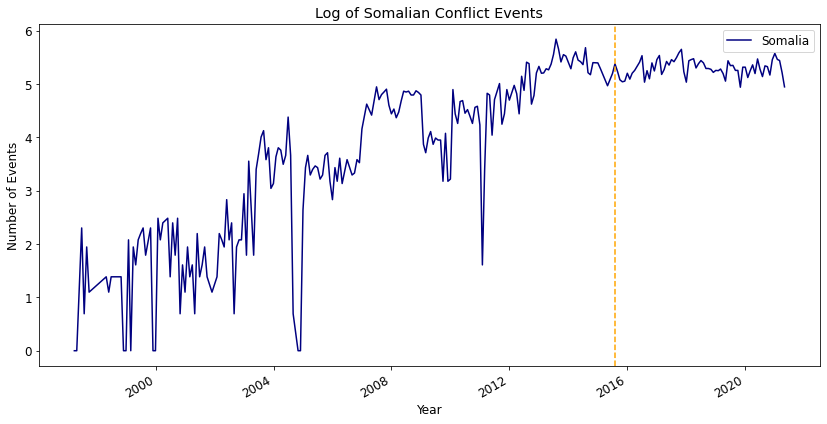

In [187]:
### Plot and inspect individual TS - Log Somalia
p = final.plot(y="log_somalia", figsize=(14,7), color = "navy")
p.axvline("2015-08-01", color="orange", linestyle="--")
plt.title('Log of Somalian Conflict Events')
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.legend(["Somalia"])
x= masterNI.year
# the plot clearly shows an upward trend in the events and a non-constant mean and variance

/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


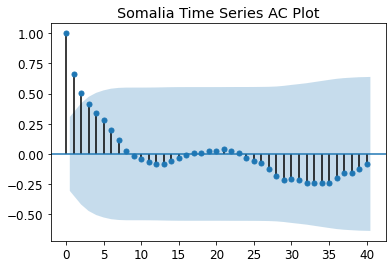

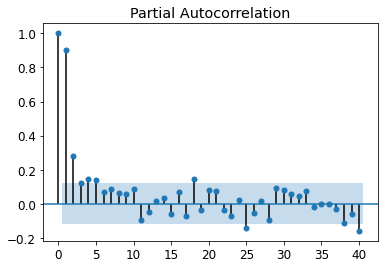

In [188]:
# Plot ACF to see whether the series suffer from serial correlation
# Autocorrelation seems to fade to 0 after about 3 lags which is not bad
# Number of lags outside 0 help determine the order of Moving Average in an ARMA model (in this case would be 3 or MA(3))
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
## Plot Autocorrelation
Som = final["log_somalia"]
somalia_acf = acf(E)
plot_acf (somalia_acf, lags=40)
plt.title('Somalia Time Series AC Plot')

# Plot Partial Autocorrelation Function
# Plot PACF to see whether the series suffer from serial correlation controlling for past autocorrelation values
# Partial Autocorrelation seems to fade to 0 after about 3-4 periods, but around 4th period there PACF is significantly different
#from zero.
# Number of lags outside 0 help determine the order of an Autoregressive process (AR) in an ARMA model 
# (in this case we can try 2 or AR(2))
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(Som.values.squeeze(), lags=40)
plt.show()

### 2. Parameter Estimation
Here we will directly difference the series via 1st order integration

In [189]:
### PARAMETER ESTIMATION, STEP 2
#from ACF and PACF, we choose AR(3) and MA(3)
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from matplotlib import pyplot
S = final["log_somalia"]
model1 = ARIMA(E, order=(3,1,3))
model1_fit = model1.fit()
# summary of fit model
print(model1_fit.summary())
#WE DEFINITELY need to choose a lower order because many parameters are not significant

/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:           log_ethiopia   No. Observations:                  270
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -333.927
Date:                Fri, 14 May 2021   AIC                            681.853
Time:                        16:49:48   BIC                            707.016
Sample:                             0   HQIC                           691.959
                                - 270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1140      0.353      0.323      0.747      -0.579       0.806
ar.L2          0.7769      0.172      4.511      0.000       0.439       1.114
ar.L3         -0.1393      0.169     -0.824      0.4

/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [190]:
### PARAMETER ESTIMATION, STEP 2
# ARIMA of order (2,1,2) with AR(2), 1 order integration (1st difference), MA(2)
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from matplotlib import pyplot
S = final["log_somalia"]
model2 = ARIMA(E, order=(2,1,2))
model2_fit = model2.fit()
# summary of fit model
print(model2_fit.summary())
#Moving average parameters are not significant, let's try reducing them

/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:           log_ethiopia   No. Observations:                  270
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -335.539
Date:                Fri, 14 May 2021   AIC                            681.077
Time:                        16:52:21   BIC                            699.051
Sample:                             0   HQIC                           688.296
                                - 270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5944      0.078     -7.655      0.000      -0.747      -0.442
ar.L2          0.2942      0.077      3.820      0.000       0.143       0.445
ma.L1          0.1427      1.685      0.085      0.9

/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [191]:
### PARAMETER ESTIMATION, STEP 2
# ARIMA of order (2,1,1) with AR(2), 1 order integration (1st difference), MA(1)
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from matplotlib import pyplot
S = final["log_somalia"]
model3 = ARIMA(E, order=(2,1,1))
model3_fit = model3.fit()
# summary of fit model
print(model3_fit.summary())
#lets try dropping MA

                               SARIMAX Results                                
Dep. Variable:           log_ethiopia   No. Observations:                  270
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -339.772
Date:                Fri, 14 May 2021   AIC                            687.543
Time:                        16:53:50   BIC                            701.922
Sample:                             0   HQIC                           693.318
                                - 270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3939      0.069      5.696      0.000       0.258       0.529
ar.L2          0.0333      0.067      0.497      0.619      -0.098       0.165
ma.L1         -0.9035      0.047    -19.304      0.0

/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [192]:
### PARAMETER ESTIMATION, STEP 2
# ARIMA of order (2,1,0) with AR(2), 1 order integration (1st difference), MA(0)
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from matplotlib import pyplot
S = final["log_somalia"]
model4 = ARIMA(E, order=(2,1,0))
model4_fit = model4.fit()
# summary of fit model
print(model4_fit.summary())
#lets try increasing AR order

                               SARIMAX Results                                
Dep. Variable:           log_ethiopia   No. Observations:                  270
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -350.458
Date:                Fri, 14 May 2021   AIC                            706.917
Time:                        16:54:55   BIC                            717.701
Sample:                             0   HQIC                           711.247
                                - 270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3971      0.059     -6.703      0.000      -0.513      -0.281
ar.L2         -0.2674      0.056     -4.781      0.000      -0.377      -0.158
sigma2         0.7920      0.062     12.721      0.0

/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [198]:
### PARAMETER ESTIMATION, STEP 2
# ARIMA of order (3,1,0) with AR(3), 1 order integration (1st difference), MA(0)
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from matplotlib import pyplot
S = final["log_somalia"]
model5 = ARIMA(E, order=(3,1,0))
model5_fit = model5.fit()
# summary of fit model
print(model5_fit.summary())
#lets try increasing AR order

                               SARIMAX Results                                
Dep. Variable:           log_ethiopia   No. Observations:                  270
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -348.265
Date:                Fri, 14 May 2021   AIC                            704.529
Time:                        17:42:11   BIC                            718.908
Sample:                             0   HQIC                           710.304
                                - 270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4320      0.061     -7.087      0.000      -0.551      -0.313
ar.L2         -0.3178      0.058     -5.491      0.000      -0.431      -0.204
ar.L3         -0.1274      0.067     -1.908      0.0

/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [195]:
### PARAMETER ESTIMATION, STEP 2
# ARIMA of order (1,1,0) with AR(1), 1 order integration (1st difference), MA(0)
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from matplotlib import pyplot
S = final["log_somalia"]
model6 = ARIMA(E, order=(1,1,0))
model6_fit = model6.fit()
# summary of fit model
print(model6_fit.summary())
#lets try increasing AR order

                               SARIMAX Results                                
Dep. Variable:           log_ethiopia   No. Observations:                  270
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -360.410
Date:                Fri, 14 May 2021   AIC                            724.819
Time:                        16:58:32   BIC                            732.009
Sample:                             0   HQIC                           727.707
                                - 270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3136      0.057     -5.526      0.000      -0.425      -0.202
sigma2         0.8533      0.068     12.639      0.000       0.721       0.986
Ljung-Box (Q):                       52.26   Jarque-

/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


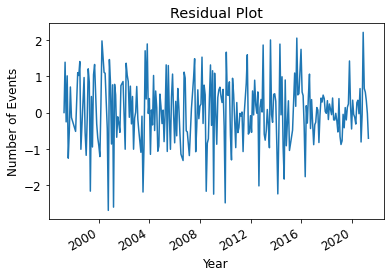

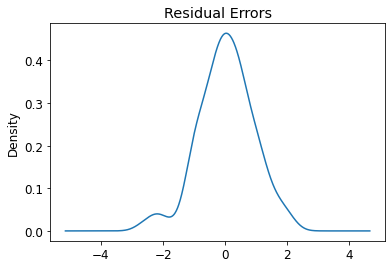

                0
count  270.000000
mean     0.031965
std      0.882824
min     -2.695292
25%     -0.502825
50%      0.012516
75%      0.567267
max      2.208754


In [236]:
#now let's evaluate our best performing Model 1 (ARIMA(3,1,0))
#line plot of residuals
#the residuals look beautiful and stationary (with constant mean and variance) There is some excess kurtosis in the residual distribution
residuals = DataFrame(model5_fit.resid)
res = residuals.plot()
pyplot.title('Residual Plot')
pyplot.legend().remove()
pyplot.xlabel("Year")
pyplot.ylabel("Number of Events")
pyplot.show()

#density plot of residuals
residuals.plot(kind='kde')
pyplot.title('Residual Errors')
pyplot.legend().remove()
pyplot.show()
# summary stats of residuals
print(residuals.describe())

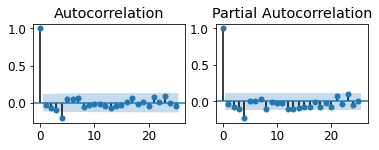

In [238]:
### Residual AC Plot, looks good as autocorrelation fades to 0 after the first lag 
from statsmodels.graphics.tsaplots import plot_pacf
pyplot.figure()
ax1 = pyplot.subplot(221)
plot_acf(residuals, lags=25, ax=pyplot.gca())
ax2 = pyplot.subplot(222)
plot_pacf(residuals, lags=25, ax=pyplot.gca())
pyplot.show()
# ### Residual AC Plot, looks good as autocorrelation fades to 0 after the first lag 
# from statsmodels.graphics.tsaplots import plot_pacf
# pyplot.figure()
# ax1 = pyplot.subplot(221)
# plot_acf(residuals, lags=25, ax=pyplot.gca())
# ax2 = pyplot.subplot(222)
# plot_pacf(residuals, lags=25, ax=pyplot.gca())
# pyplot.show()



predicted=5.288027, expected=5.459586
predicted=5.337877, expected=5.537334
predicted=5.500659, expected=5.181784
predicted=5.267690, expected=5.273000
predicted=5.281736, expected=5.424950
predicted=5.421509, expected=5.356586
predicted=5.338845, expected=5.459586
predicted=5.398415, expected=5.420535
predicted=5.432558, expected=5.497168
predicted=5.451682, expected=5.587249
predicted=5.545659, expected=5.652489
predicted=5.594663, expected=5.231109
predicted=5.371266, expected=5.036953
predicted=5.174896, expected=5.438079
predicted=5.397915, expected=5.459586
predicted=5.420921, expected=5.476464
predicted=5.382298, expected=5.303305
predicted=5.365705, expected=5.384495
predicted=5.378615, expected=5.442418
predicted=5.440940, expected=5.398163
predicted=5.388895, expected=5.293305
predicted=5.331294, expected=5.293305
predicted=5.320978, expected=5.278115
predicted=5.306141, expected=5.220356
predicted=5.246324, expected=5.257495
predicted=5.255831, expected=5.252273
predicted=5.

/Users/jamilion/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


predicted=5.286184, expected=5.257495
predicted=5.313785, expected=5.257495
predicted=5.273126, expected=4.941642
predicted=5.088858, expected=5.318120
predicted=5.221513, expected=5.318120
predicted=5.317821, expected=5.123964
predicted=5.123814, expected=5.247024
predicted=5.231587, expected=5.361292
predicted=5.333760, expected=5.198497
predicted=5.218479, expected=5.472271
predicted=5.366431, expected=5.283204
predicted=5.345233, expected=5.141664
predicted=5.175605, expected=5.342334
predicted=5.325396, expected=5.327876
predicted=5.327466, expected=5.170484
predicted=5.195226, expected=5.459586
predicted=5.373263, expected=5.575949
predicted=5.509874, expected=5.463832
predicted=5.428658, expected=5.442418
predicted=5.446990, expected=5.214936
predicted=5.334213, expected=4.948760
Test RMSE: 0.167


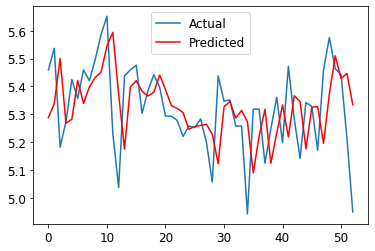

In [196]:
#### Forecasting with ARIMA (3,1,0)
from sklearn.metrics import mean_squared_error #forecaset evaluation metric RMSE
from math import sqrt
X = Som.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(3,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.legend(["Actual", "Predicted"])
pyplot.show()

predicted=5.300090, expected=5.459586
predicted=5.384908, expected=5.537334
predicted=5.510041, expected=5.181784
predicted=5.306680, expected=5.273000
predicted=5.240966, expected=5.424950
predicted=5.371609, expected=5.356586
predicted=5.380587, expected=5.459586
predicted=5.423420, expected=5.420535
predicted=5.434247, expected=5.497168
predicted=5.470257, expected=5.587249
predicted=5.555622, expected=5.652489
predicted=5.629588, expected=5.231109
predicted=5.379120, expected=5.036953
predicted=5.104910, expected=5.438079
predicted=5.297454, expected=5.459586
predicted=5.452058, expected=5.476464
predicted=5.470556, expected=5.303305
predicted=5.363920, expected=5.384495
predicted=5.356071, expected=5.442418
predicted=5.422143, expected=5.398163
predicted=5.413655, expected=5.293305
predicted=5.330007, expected=5.293305
predicted=5.293305, expected=5.278115
predicted=5.283431, expected=5.220356
predicted=5.240571, expected=5.257495
predicted=5.244496, expected=5.252273
predicted=5.

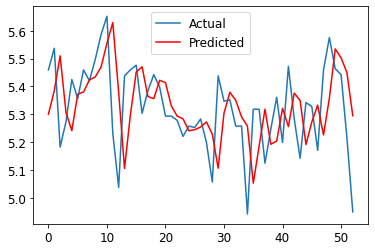

In [239]:
#### Forecasting with ARIMA (1,1,0)
from sklearn.metrics import mean_squared_error #forecaset evaluation metric RMSE
from math import sqrt
X = Som.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.legend(["Actual", "Predicted"])
pyplot.show()

## Conclusions
Overall, ARIMA deemed useful in fitting the conflict event data and event successful for out-of-sample forecasting (in the case of Somalia), however much poorer performance in the case of Ethiopia. 
We have clearly demonstrated that we could remove unit root by taking a first difference and then fitting the best performing model in terms of information criteria and log likelihoods. 
The out-of-sample forecasting models were the ones that best performed as shown in summary tables. 
This process was demonstrated for 2 African countries that are experiencing civil conflict up until today. 
The power point presentation is updated according to this file with the latest results and summary tables demonstrating best fitting models and the logic behind. 

Thank you for your attention and hope this project was useful and interesting for you!